In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.model_selection import train_test_split 
from sklearn import preprocessing

## Load and clean data

In [2]:
# Read csv

df = pd.read_csv("../preProcessing/rents_encoded.csv")
df = df.drop("Unnamed: 0", axis="columns")

df.head()

,city_Antelope,city_Carmichael,city_Citrus Heights,city_Elk Grove,city_Fair Oaks,city_Folsom,city_Gold River,city_North Highlands,city_Orangevale,city_Rancho Cordova,...,zipcode_95838,zipcode_95841,zipcode_95842,zipcode_95843,zipcode_95864,beds,baths,square_footage,year_built,price
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3.0,2.0,1043.0,1958.0,1650
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,2.0,1000.0,1950.0,1400
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,1.5,750.0,1972.0,1695
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,2.0,850.0,1972.0,1625
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,2.0,1100.0,1972.0,1625


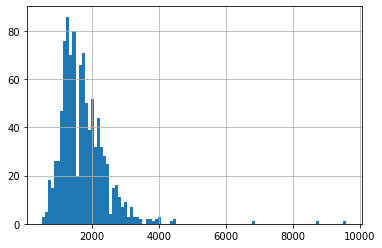

In [5]:
df['price'].hist(bins=100)

# Train Test Split

In [6]:
X = df.drop(["price"], axis="columns")
y = df['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15) 

In [9]:
# Show train stats
X_train_stats = X_train.describe()
X_train_stats

,city_Antelope,city_Carmichael,city_Citrus Heights,city_Elk Grove,city_Fair Oaks,city_Folsom,city_Gold River,city_North Highlands,city_Orangevale,city_Rancho Cordova,...,zipcode_95835,zipcode_95838,zipcode_95841,zipcode_95842,zipcode_95843,zipcode_95864,beds,baths,square_footage,year_built
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,...,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,0.003509,0.058480,0.026901,0.012865,0.017544,0.002339,0.003509,0.008187,0.008187,0.033918,...,0.025731,0.010526,0.012865,0.015205,0.004678,0.021053,2.472515,2.106433,1444.832749,1972.736842
std,0.059165,0.234785,0.161888,0.112760,0.131363,0.048337,0.059165,0.090164,0.090164,0.181124,...,0.158424,0.102116,0.112760,0.122438,0.068278,0.143644,0.829141,0.340159,1946.804964,21.501696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.500000,10.000000,1880.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,850.000000,1968.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1100.000000,1972.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1538.000000,1977.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,4.000000,38116.000000,2020.000000


## Normalize data

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train.values)
X_train_scaled = pd.DataFrame(x_scaled)

X_test_scaled = pd.DataFrame(min_max_scaler.transform(X_test.values))

X_train_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,...,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,0.003509,0.058480,0.026901,0.012865,0.017544,0.002339,0.003509,0.008187,0.008187,0.033918,...,0.025731,0.010526,0.012865,0.015205,0.004678,0.021053,0.210359,0.242573,0.037654,0.662406
std,0.059165,0.234785,0.161888,0.112760,0.131363,0.048337,0.059165,0.090164,0.090164,0.181124,...,0.158424,0.102116,0.112760,0.122438,0.068278,0.143644,0.118449,0.136064,0.051089,0.153584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.200000,0.022044,0.628571
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.200000,0.028604,0.657143
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.200000,0.040099,0.692857
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build model

In [34]:
# model = keras.Sequential([
#     layers.Dense(400, activation='relu', input_shape=[len(X_train.keys())]),
#     layers.PReLU(),
#     layers.Dropout(.4),
#     layers.Dense(units = 160 , kernel_initializer = 'normal'),
#     layers.BatchNormalization(),
#     layers.Dropout(.5),
    
#   ])

def build_model():
    model = keras.Sequential([
        layers.Dense(400, activation='relu', input_shape=[len(X_train.keys())]),
        layers.PReLU(),
        layers.Dropout(.4),
        layers.Dense(units = 160 , kernel_initializer = 'normal'),
        layers.BatchNormalization(),
        layers.Dropout(.6),
        layers.Dense(units = 64 , kernel_initializer = 'normal'),
        layers.BatchNormalization(),
        layers.Dropout(.5),
        layers.Dense(units = 26 , kernel_initializer = 'normal'),
        layers.BatchNormalization(),
        layers.Dropout(.1),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [35]:
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 400)               91200     
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 400)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 160)               64160     
_________________________________________________________________
batch_normalization (BatchNo (None, 160)               640       
_________________________________________________________________
dropout_2 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

# Train model

In [37]:
EPOCHS = 1000

history = model.fit(
  X_train_scaled, y_train,
  epochs=EPOCHS, validation_split=0.15, verbose=1)

!say done

Train on 726 samples, validate on 129 samples
Epoch 1/1000
726/726 [==============================] - 0s 438us/sample - loss: 2098654.0076 - mae: 1401.9526 - mse: 2098654.0000 - val_loss: 2050908.3624 - val_mae: 1374.5095 - val_mse: 2050908.3750
Epoch 2/1000
726/726 [==============================] - 0s 417us/sample - loss: 2092500.0358 - mae: 1400.1598 - mse: 2092500.1250 - val_loss: 1983810.1008 - val_mae: 1353.6200 - val_mse: 1983810.0000
Epoch 3/1000
726/726 [==============================] - 0s 428us/sample - loss: 2065727.4979 - mae: 1392.3810 - mse: 2065727.5000 - val_loss: 1987607.6841 - val_mae: 1354.4102 - val_mse: 1987607.6250
Epoch 4/1000
726/726 [==============================] - 0s 482us/sample - loss: 2052417.2183 - mae: 1389.9281 - mse: 2052417.2500 - val_loss: 1934690.8198 - val_mae: 1338.0245 - val_mse: 1934690.7500
Epoch 5/1000
726/726 [==============================] - 0s 449us/sample - loss: 2037315.9215 - mae: 1381.9962 - mse: 2037316.0000 - val_loss: 1992030.8711

Epoch 41/1000
726/726 [==============================] - 1s 795us/sample - loss: 1550648.2806 - mae: 1208.5688 - mse: 1550648.2500 - val_loss: 1548569.2461 - val_mae: 1193.2058 - val_mse: 1548569.1250
Epoch 42/1000
726/726 [==============================] - 1s 725us/sample - loss: 1535646.2183 - mae: 1205.3900 - mse: 1535646.1250 - val_loss: 1531379.0790 - val_mae: 1186.7225 - val_mse: 1531379.0000
Epoch 43/1000
726/726 [==============================] - 1s 698us/sample - loss: 1518238.3898 - mae: 1200.3977 - mse: 1518238.1250 - val_loss: 1470405.8479 - val_mae: 1162.0260 - val_mse: 1470405.7500
Epoch 44/1000
726/726 [==============================] - 1s 690us/sample - loss: 1505852.1705 - mae: 1195.1178 - mse: 1505852.1250 - val_loss: 1541000.2868 - val_mae: 1190.3923 - val_mse: 1541000.2500
Epoch 45/1000
726/726 [==============================] - 0s 677us/sample - loss: 1501974.5921 - mae: 1186.6439 - mse: 1501974.7500 - val_loss: 1436180.0514 - val_mae: 1144.7677 - val_mse: 1436180.

Epoch 82/1000
726/726 [==============================] - 0s 537us/sample - loss: 1017479.3502 - mae: 974.3458 - mse: 1017479.3125 - val_loss: 952345.5816 - val_mae: 909.0983 - val_mse: 952345.6250
Epoch 83/1000
726/726 [==============================] - 0s 541us/sample - loss: 1011561.7455 - mae: 966.4226 - mse: 1011561.8125 - val_loss: 987041.6802 - val_mae: 927.0601 - val_mse: 987041.6875
Epoch 84/1000
726/726 [==============================] - 0s 526us/sample - loss: 987817.9322 - mae: 956.9266 - mse: 987817.8750 - val_loss: 1045368.8459 - val_mae: 952.7272 - val_mse: 1045368.9375
Epoch 85/1000
726/726 [==============================] - 0s 531us/sample - loss: 986221.9907 - mae: 952.9306 - mse: 986221.9375 - val_loss: 1083514.6982 - val_mae: 972.1242 - val_mse: 1083514.6250
Epoch 86/1000
726/726 [==============================] - 0s 534us/sample - loss: 982841.9578 - mae: 949.8130 - mse: 982842.0625 - val_loss: 996785.2868 - val_mae: 932.1409 - val_mse: 996785.3125
Epoch 87/1000
726

Epoch 124/1000
726/726 [==============================] - 0s 571us/sample - loss: 563416.3175 - mae: 692.3550 - mse: 563416.3125 - val_loss: 603166.1564 - val_mae: 695.5344 - val_mse: 603166.1250
Epoch 125/1000
726/726 [==============================] - 0s 576us/sample - loss: 543622.8141 - mae: 688.3184 - mse: 543622.8750 - val_loss: 580725.5024 - val_mae: 675.5630 - val_mse: 580725.5000
Epoch 126/1000
726/726 [==============================] - 0s 581us/sample - loss: 541014.1589 - mae: 676.9810 - mse: 541014.1250 - val_loss: 533749.2282 - val_mae: 644.5769 - val_mse: 533749.2500
Epoch 127/1000
726/726 [==============================] - 0s 568us/sample - loss: 535599.8094 - mae: 674.5839 - mse: 535599.8125 - val_loss: 582259.6056 - val_mae: 680.7719 - val_mse: 582259.6250
Epoch 128/1000
726/726 [==============================] - 0s 545us/sample - loss: 543747.6036 - mae: 666.7969 - mse: 543747.6250 - val_loss: 552546.6318 - val_mae: 663.5114 - val_mse: 552546.6875
Epoch 129/1000
726/7

Epoch 166/1000
726/726 [==============================] - 0s 533us/sample - loss: 209872.3119 - mae: 382.7137 - mse: 209872.3281 - val_loss: 265742.6833 - val_mae: 412.8472 - val_mse: 265742.6562
Epoch 167/1000
726/726 [==============================] - 0s 535us/sample - loss: 230995.3777 - mae: 376.0227 - mse: 230995.3750 - val_loss: 270728.6129 - val_mae: 415.6764 - val_mse: 270728.5938
Epoch 168/1000
726/726 [==============================] - 0s 528us/sample - loss: 206032.9355 - mae: 364.9874 - mse: 206032.9531 - val_loss: 251020.8803 - val_mae: 396.8669 - val_mse: 251020.8750
Epoch 169/1000
726/726 [==============================] - 0s 541us/sample - loss: 193481.3233 - mae: 356.2535 - mse: 193481.3438 - val_loss: 236212.2103 - val_mae: 382.4260 - val_mse: 236212.2031
Epoch 170/1000
726/726 [==============================] - 0s 537us/sample - loss: 196758.4155 - mae: 356.3777 - mse: 196758.3906 - val_loss: 259017.1223 - val_mae: 405.3097 - val_mse: 259017.1094
Epoch 171/1000
726/7

Epoch 208/1000
726/726 [==============================] - 0s 558us/sample - loss: 99322.6129 - mae: 199.6114 - mse: 99322.6094 - val_loss: 160838.9679 - val_mae: 289.1283 - val_mse: 160838.9844
Epoch 209/1000
726/726 [==============================] - 0s 547us/sample - loss: 101478.8819 - mae: 188.5791 - mse: 101478.8672 - val_loss: 152386.1259 - val_mae: 277.5156 - val_mse: 152386.1250
Epoch 210/1000
726/726 [==============================] - 0s 551us/sample - loss: 92729.3144 - mae: 192.6254 - mse: 92729.3203 - val_loss: 155715.1213 - val_mae: 278.2865 - val_mse: 155715.1094
Epoch 211/1000
726/726 [==============================] - 0s 548us/sample - loss: 95035.0915 - mae: 207.9259 - mse: 95035.0938 - val_loss: 158959.2175 - val_mae: 283.8456 - val_mse: 158959.2188
Epoch 212/1000
726/726 [==============================] - 0s 556us/sample - loss: 81589.5259 - mae: 189.9964 - mse: 81589.5312 - val_loss: 152475.0007 - val_mae: 277.0317 - val_mse: 152475.0000
Epoch 213/1000
726/726 [====

726/726 [==============================] - 0s 528us/sample - loss: 73549.3699 - mae: 176.4820 - mse: 73549.3750 - val_loss: 159227.8170 - val_mae: 282.2983 - val_mse: 159227.8125
Epoch 251/1000
726/726 [==============================] - 0s 533us/sample - loss: 80540.9538 - mae: 178.6321 - mse: 80540.9453 - val_loss: 161961.5016 - val_mae: 281.6345 - val_mse: 161961.4844
Epoch 252/1000
726/726 [==============================] - 0s 520us/sample - loss: 92098.2339 - mae: 197.6242 - mse: 92098.2344 - val_loss: 159097.9779 - val_mae: 284.1690 - val_mse: 159097.9688
Epoch 253/1000
726/726 [==============================] - 0s 523us/sample - loss: 81161.9193 - mae: 180.5550 - mse: 81161.9141 - val_loss: 156732.4148 - val_mae: 284.3074 - val_mse: 156732.4219
Epoch 254/1000
726/726 [==============================] - 0s 513us/sample - loss: 87082.1008 - mae: 191.3001 - mse: 87082.1016 - val_loss: 159394.6085 - val_mae: 284.0208 - val_mse: 159394.6094
Epoch 255/1000
726/726 [=====================

726/726 [==============================] - 0s 563us/sample - loss: 84143.4061 - mae: 187.7472 - mse: 84143.3984 - val_loss: 160334.8280 - val_mae: 285.3024 - val_mse: 160334.8281
Epoch 293/1000
726/726 [==============================] - 0s 551us/sample - loss: 87460.7306 - mae: 194.0156 - mse: 87460.7344 - val_loss: 160587.1399 - val_mae: 287.5064 - val_mse: 160587.1406
Epoch 294/1000
726/726 [==============================] - 0s 566us/sample - loss: 87050.3044 - mae: 181.8136 - mse: 87050.3047 - val_loss: 165442.7813 - val_mae: 290.3851 - val_mse: 165442.7969
Epoch 295/1000
726/726 [==============================] - 0s 550us/sample - loss: 91945.3196 - mae: 184.0274 - mse: 91945.3203 - val_loss: 160148.1203 - val_mae: 285.6856 - val_mse: 160148.1250
Epoch 296/1000
726/726 [==============================] - 0s 566us/sample - loss: 96324.9235 - mae: 182.6062 - mse: 96324.9219 - val_loss: 161151.4971 - val_mae: 284.4219 - val_mse: 161151.4844
Epoch 297/1000
726/726 [=====================

726/726 [==============================] - 0s 518us/sample - loss: 97396.5380 - mae: 196.2083 - mse: 97396.5391 - val_loss: 155690.8957 - val_mae: 280.4813 - val_mse: 155690.8906
Epoch 335/1000
726/726 [==============================] - 0s 511us/sample - loss: 86403.1332 - mae: 185.3223 - mse: 86403.1328 - val_loss: 163064.9104 - val_mae: 285.5752 - val_mse: 163064.9219
Epoch 336/1000
726/726 [==============================] - 0s 523us/sample - loss: 100808.1514 - mae: 197.3013 - mse: 100808.1562 - val_loss: 158082.8002 - val_mae: 284.9278 - val_mse: 158082.8125
Epoch 337/1000
726/726 [==============================] - 0s 507us/sample - loss: 88367.3762 - mae: 185.5755 - mse: 88367.3750 - val_loss: 157536.1773 - val_mae: 280.5503 - val_mse: 157536.1719
Epoch 338/1000
726/726 [==============================] - 0s 506us/sample - loss: 81383.7497 - mae: 189.3473 - mse: 81383.7578 - val_loss: 160184.4188 - val_mae: 279.8388 - val_mse: 160184.4219
Epoch 339/1000
726/726 [===================

726/726 [==============================] - 0s 544us/sample - loss: 77776.9633 - mae: 177.8842 - mse: 77776.9609 - val_loss: 163423.2340 - val_mae: 287.2085 - val_mse: 163423.2344
Epoch 377/1000
726/726 [==============================] - 0s 554us/sample - loss: 90172.5837 - mae: 195.5197 - mse: 90172.5781 - val_loss: 161191.3883 - val_mae: 282.0927 - val_mse: 161191.3906
Epoch 378/1000
726/726 [==============================] - 0s 552us/sample - loss: 93016.1547 - mae: 190.8312 - mse: 93016.1562 - val_loss: 156248.4670 - val_mae: 279.4141 - val_mse: 156248.4688
Epoch 379/1000
726/726 [==============================] - 0s 568us/sample - loss: 76777.0173 - mae: 185.8551 - mse: 76777.0156 - val_loss: 161816.1493 - val_mae: 284.2648 - val_mse: 161816.1562
Epoch 380/1000
726/726 [==============================] - 0s 560us/sample - loss: 88842.9384 - mae: 189.4382 - mse: 88842.9453 - val_loss: 160784.8829 - val_mae: 283.7831 - val_mse: 160784.8750
Epoch 381/1000
726/726 [=====================

726/726 [==============================] - 0s 536us/sample - loss: 92417.2379 - mae: 197.8498 - mse: 92417.2422 - val_loss: 162237.3819 - val_mae: 283.8493 - val_mse: 162237.3750
Epoch 419/1000
726/726 [==============================] - 0s 529us/sample - loss: 102690.5786 - mae: 190.3876 - mse: 102690.5781 - val_loss: 162947.8275 - val_mae: 285.3246 - val_mse: 162947.8125
Epoch 420/1000
726/726 [==============================] - 0s 537us/sample - loss: 78799.8516 - mae: 183.5423 - mse: 78799.8516 - val_loss: 158872.1164 - val_mae: 281.4302 - val_mse: 158872.1250
Epoch 421/1000
726/726 [==============================] - 0s 538us/sample - loss: 92392.4443 - mae: 207.6949 - mse: 92392.4453 - val_loss: 160817.5493 - val_mae: 290.6020 - val_mse: 160817.5469
Epoch 422/1000
726/726 [==============================] - 0s 532us/sample - loss: 84604.4250 - mae: 192.4464 - mse: 84604.4297 - val_loss: 159778.6752 - val_mae: 286.0551 - val_mse: 159778.6875
Epoch 423/1000
726/726 [===================

726/726 [==============================] - 0s 539us/sample - loss: 94898.9600 - mae: 191.5400 - mse: 94898.9531 - val_loss: 161869.8507 - val_mae: 285.3996 - val_mse: 161869.8594
Epoch 461/1000
726/726 [==============================] - 0s 530us/sample - loss: 91669.1584 - mae: 198.3659 - mse: 91669.1562 - val_loss: 162420.7540 - val_mae: 286.9655 - val_mse: 162420.7656
Epoch 462/1000
726/726 [==============================] - 0s 531us/sample - loss: 104808.8352 - mae: 195.9049 - mse: 104808.8516 - val_loss: 162019.0271 - val_mae: 283.9961 - val_mse: 162019.0156
Epoch 463/1000
726/726 [==============================] - 0s 537us/sample - loss: 78751.8099 - mae: 187.4058 - mse: 78751.7969 - val_loss: 160665.3923 - val_mae: 284.7377 - val_mse: 160665.3906
Epoch 464/1000
726/726 [==============================] - 0s 529us/sample - loss: 91121.3654 - mae: 200.2228 - mse: 91121.3516 - val_loss: 163915.3920 - val_mae: 286.9899 - val_mse: 163915.3906
Epoch 465/1000
726/726 [===================

726/726 [==============================] - 0s 514us/sample - loss: 79720.2783 - mae: 187.1133 - mse: 79720.2891 - val_loss: 163871.6258 - val_mae: 286.1067 - val_mse: 163871.6250
Epoch 503/1000
726/726 [==============================] - 0s 508us/sample - loss: 103904.3132 - mae: 205.2332 - mse: 103904.3047 - val_loss: 161994.7128 - val_mae: 280.2201 - val_mse: 161994.7188
Epoch 504/1000
726/726 [==============================] - 0s 506us/sample - loss: 88623.8738 - mae: 198.6523 - mse: 88623.8750 - val_loss: 163435.2262 - val_mae: 284.6440 - val_mse: 163435.2344
Epoch 505/1000
726/726 [==============================] - 0s 507us/sample - loss: 85287.7204 - mae: 180.0322 - mse: 85287.7109 - val_loss: 163132.6971 - val_mae: 283.8803 - val_mse: 163132.6875
Epoch 506/1000
726/726 [==============================] - 0s 508us/sample - loss: 101499.9598 - mae: 199.8892 - mse: 101499.9688 - val_loss: 162435.1795 - val_mae: 282.5897 - val_mse: 162435.1719
Epoch 507/1000
726/726 [=================

726/726 [==============================] - 0s 533us/sample - loss: 80899.6905 - mae: 174.6318 - mse: 80899.6953 - val_loss: 160367.3283 - val_mae: 277.9596 - val_mse: 160367.3125
Epoch 545/1000
726/726 [==============================] - 0s 530us/sample - loss: 89164.3369 - mae: 201.1882 - mse: 89164.3281 - val_loss: 157214.4642 - val_mae: 278.5204 - val_mse: 157214.4688
Epoch 546/1000
726/726 [==============================] - 0s 534us/sample - loss: 87941.2749 - mae: 200.2761 - mse: 87941.2812 - val_loss: 162655.5413 - val_mae: 284.7678 - val_mse: 162655.5469
Epoch 547/1000
726/726 [==============================] - 0s 552us/sample - loss: 94375.8369 - mae: 196.4566 - mse: 94375.8203 - val_loss: 161478.3578 - val_mae: 287.9824 - val_mse: 161478.3594
Epoch 548/1000
726/726 [==============================] - 0s 555us/sample - loss: 93521.3653 - mae: 192.1294 - mse: 93521.3516 - val_loss: 160693.1445 - val_mae: 281.9399 - val_mse: 160693.1406
Epoch 549/1000
726/726 [=====================

726/726 [==============================] - 0s 536us/sample - loss: 86019.2106 - mae: 197.1004 - mse: 86019.2031 - val_loss: 163600.4377 - val_mae: 287.0593 - val_mse: 163600.4375
Epoch 587/1000
726/726 [==============================] - 0s 534us/sample - loss: 92600.6372 - mae: 187.8056 - mse: 92600.6250 - val_loss: 167054.8769 - val_mae: 287.9525 - val_mse: 167054.8750
Epoch 588/1000
726/726 [==============================] - 0s 545us/sample - loss: 77567.3160 - mae: 187.9035 - mse: 77567.3203 - val_loss: 167607.9326 - val_mae: 290.2009 - val_mse: 167607.9375
Epoch 589/1000
726/726 [==============================] - 0s 542us/sample - loss: 90608.7029 - mae: 202.1948 - mse: 90608.7109 - val_loss: 167281.0399 - val_mae: 293.0759 - val_mse: 167281.0312
Epoch 590/1000
726/726 [==============================] - 0s 547us/sample - loss: 97041.7424 - mae: 195.0829 - mse: 97041.7422 - val_loss: 161764.1484 - val_mae: 284.2538 - val_mse: 161764.1562
Epoch 591/1000
726/726 [=====================

726/726 [==============================] - 0s 535us/sample - loss: 108895.8428 - mae: 198.8303 - mse: 108895.8438 - val_loss: 162645.3033 - val_mae: 288.8025 - val_mse: 162645.2812
Epoch 629/1000
726/726 [==============================] - 0s 514us/sample - loss: 93539.1813 - mae: 199.5204 - mse: 93539.1875 - val_loss: 167418.8394 - val_mae: 292.3797 - val_mse: 167418.8438
Epoch 630/1000
726/726 [==============================] - 0s 517us/sample - loss: 88061.2433 - mae: 197.1249 - mse: 88061.2578 - val_loss: 167466.9005 - val_mae: 288.5714 - val_mse: 167466.9062
Epoch 631/1000
726/726 [==============================] - 0s 518us/sample - loss: 74417.7338 - mae: 168.6934 - mse: 74417.7500 - val_loss: 167617.5518 - val_mae: 290.6629 - val_mse: 167617.5312
Epoch 632/1000
726/726 [==============================] - 0s 517us/sample - loss: 81769.9197 - mae: 183.0718 - mse: 81769.9219 - val_loss: 171325.7229 - val_mae: 297.4207 - val_mse: 171325.7188
Epoch 633/1000
726/726 [===================

726/726 [==============================] - 0s 488us/sample - loss: 81378.1253 - mae: 180.9891 - mse: 81378.1250 - val_loss: 166338.4801 - val_mae: 285.9818 - val_mse: 166338.5000
Epoch 671/1000
726/726 [==============================] - 0s 498us/sample - loss: 67258.4636 - mae: 168.7019 - mse: 67258.4766 - val_loss: 168974.9400 - val_mae: 286.5569 - val_mse: 168974.9531
Epoch 672/1000
726/726 [==============================] - 0s 500us/sample - loss: 82177.7703 - mae: 189.2949 - mse: 82177.7656 - val_loss: 169826.6634 - val_mae: 291.7858 - val_mse: 169826.6719
Epoch 673/1000
726/726 [==============================] - 0s 513us/sample - loss: 82046.8143 - mae: 182.7289 - mse: 82046.8125 - val_loss: 167716.8874 - val_mae: 287.5682 - val_mse: 167716.8906
Epoch 674/1000
726/726 [==============================] - 0s 503us/sample - loss: 109247.9409 - mae: 200.8157 - mse: 109247.9219 - val_loss: 168821.9570 - val_mae: 290.0844 - val_mse: 168821.9531
Epoch 675/1000
726/726 [===================

726/726 [==============================] - 0s 525us/sample - loss: 96641.2736 - mae: 182.6526 - mse: 96641.2812 - val_loss: 170667.3498 - val_mae: 294.8937 - val_mse: 170667.3438
Epoch 713/1000
726/726 [==============================] - 0s 504us/sample - loss: 83953.2256 - mae: 191.3074 - mse: 83953.2266 - val_loss: 167904.0014 - val_mae: 291.2892 - val_mse: 167904.0000
Epoch 714/1000
726/726 [==============================] - 0s 507us/sample - loss: 115540.0705 - mae: 204.9642 - mse: 115540.0781 - val_loss: 168342.3955 - val_mae: 292.8482 - val_mse: 168342.4062
Epoch 715/1000
726/726 [==============================] - 0s 505us/sample - loss: 72869.2661 - mae: 168.2676 - mse: 72869.2734 - val_loss: 170712.1784 - val_mae: 295.6471 - val_mse: 170712.1875
Epoch 716/1000
726/726 [==============================] - 0s 510us/sample - loss: 79799.9274 - mae: 183.4645 - mse: 79799.9297 - val_loss: 168280.3898 - val_mae: 292.3397 - val_mse: 168280.3906
Epoch 717/1000
726/726 [===================

726/726 [==============================] - 0s 527us/sample - loss: 83594.8341 - mae: 188.4615 - mse: 83594.8359 - val_loss: 165695.9973 - val_mae: 287.2509 - val_mse: 165696.0000
Epoch 755/1000
726/726 [==============================] - 0s 526us/sample - loss: 81171.9008 - mae: 183.8134 - mse: 81171.8984 - val_loss: 165473.1796 - val_mae: 284.8930 - val_mse: 165473.1719
Epoch 756/1000
726/726 [==============================] - 0s 526us/sample - loss: 82985.1498 - mae: 176.4351 - mse: 82985.1484 - val_loss: 166984.8896 - val_mae: 290.0161 - val_mse: 166984.9062
Epoch 757/1000
726/726 [==============================] - 0s 528us/sample - loss: 91768.6145 - mae: 195.0941 - mse: 91768.6094 - val_loss: 172747.6410 - val_mae: 296.6732 - val_mse: 172747.6562
Epoch 758/1000
726/726 [==============================] - 0s 545us/sample - loss: 77879.2815 - mae: 186.2325 - mse: 77879.2812 - val_loss: 174327.8574 - val_mae: 298.0515 - val_mse: 174327.8594
Epoch 759/1000
726/726 [=====================

726/726 [==============================] - 0s 512us/sample - loss: 84429.9925 - mae: 192.0918 - mse: 84429.9922 - val_loss: 167066.9177 - val_mae: 290.5764 - val_mse: 167066.9062
Epoch 797/1000
726/726 [==============================] - 0s 508us/sample - loss: 86547.6066 - mae: 189.1673 - mse: 86547.6016 - val_loss: 168348.4301 - val_mae: 288.7483 - val_mse: 168348.4375
Epoch 798/1000
726/726 [==============================] - 0s 504us/sample - loss: 79148.3678 - mae: 177.2000 - mse: 79148.3672 - val_loss: 164954.7702 - val_mae: 283.5347 - val_mse: 164954.7812
Epoch 799/1000
726/726 [==============================] - 0s 504us/sample - loss: 92954.3170 - mae: 197.9874 - mse: 92954.3125 - val_loss: 165508.9833 - val_mae: 285.2139 - val_mse: 165508.9844
Epoch 800/1000
726/726 [==============================] - 0s 496us/sample - loss: 89185.7590 - mae: 184.3913 - mse: 89185.7656 - val_loss: 169834.8343 - val_mae: 290.6465 - val_mse: 169834.8438
Epoch 801/1000
726/726 [=====================

726/726 [==============================] - 0s 534us/sample - loss: 98787.7179 - mae: 198.8792 - mse: 98787.7109 - val_loss: 175118.8939 - val_mae: 297.8600 - val_mse: 175118.9062
Epoch 839/1000
726/726 [==============================] - 0s 557us/sample - loss: 84156.0658 - mae: 190.5622 - mse: 84156.0547 - val_loss: 172061.3111 - val_mae: 293.8297 - val_mse: 172061.3125
Epoch 840/1000
726/726 [==============================] - 0s 530us/sample - loss: 85252.8232 - mae: 185.9376 - mse: 85252.8281 - val_loss: 172468.7122 - val_mae: 292.7910 - val_mse: 172468.7031
Epoch 841/1000
726/726 [==============================] - 0s 533us/sample - loss: 98933.1980 - mae: 184.4015 - mse: 98933.2031 - val_loss: 171997.9992 - val_mae: 295.4676 - val_mse: 171998.0156
Epoch 842/1000
726/726 [==============================] - 0s 528us/sample - loss: 79295.6466 - mae: 179.3032 - mse: 79295.6328 - val_loss: 166321.8886 - val_mae: 288.7224 - val_mse: 166321.8906
Epoch 843/1000
726/726 [=====================

726/726 [==============================] - 0s 493us/sample - loss: 94762.5121 - mae: 189.7674 - mse: 94762.5156 - val_loss: 171935.5682 - val_mae: 292.9700 - val_mse: 171935.5781
Epoch 881/1000
726/726 [==============================] - 0s 490us/sample - loss: 80798.3084 - mae: 179.4885 - mse: 80798.3047 - val_loss: 166886.2906 - val_mae: 288.4225 - val_mse: 166886.2969
Epoch 882/1000
726/726 [==============================] - 0s 492us/sample - loss: 78414.0788 - mae: 184.9494 - mse: 78414.0859 - val_loss: 171106.4145 - val_mae: 296.1611 - val_mse: 171106.4219
Epoch 883/1000
726/726 [==============================] - 0s 492us/sample - loss: 93002.6424 - mae: 190.8388 - mse: 93002.6484 - val_loss: 167984.6856 - val_mae: 296.3786 - val_mse: 167984.6875
Epoch 884/1000
726/726 [==============================] - 0s 488us/sample - loss: 82951.1321 - mae: 187.3437 - mse: 82951.1406 - val_loss: 171777.1043 - val_mae: 301.8971 - val_mse: 171777.0938
Epoch 885/1000
726/726 [=====================

726/726 [==============================] - 0s 490us/sample - loss: 90073.9981 - mae: 197.2804 - mse: 90074.0000 - val_loss: 168690.8190 - val_mae: 289.8572 - val_mse: 168690.8281
Epoch 923/1000
726/726 [==============================] - 0s 488us/sample - loss: 88116.7178 - mae: 188.5246 - mse: 88116.7188 - val_loss: 169027.1537 - val_mae: 291.9582 - val_mse: 169027.1406
Epoch 924/1000
726/726 [==============================] - 0s 488us/sample - loss: 87443.9629 - mae: 175.0571 - mse: 87443.9531 - val_loss: 168177.1527 - val_mae: 289.5287 - val_mse: 168177.1562
Epoch 925/1000
726/726 [==============================] - 0s 490us/sample - loss: 83445.8648 - mae: 182.9114 - mse: 83445.8750 - val_loss: 169234.5661 - val_mae: 291.3759 - val_mse: 169234.5781
Epoch 926/1000
726/726 [==============================] - 0s 488us/sample - loss: 84765.9307 - mae: 183.7726 - mse: 84765.9297 - val_loss: 167295.6502 - val_mae: 289.7473 - val_mse: 167295.6406
Epoch 927/1000
726/726 [=====================

726/726 [==============================] - 0s 506us/sample - loss: 82540.8892 - mae: 186.0446 - mse: 82540.8906 - val_loss: 169983.4692 - val_mae: 292.8531 - val_mse: 169983.4531
Epoch 965/1000
726/726 [==============================] - 0s 502us/sample - loss: 98063.9520 - mae: 191.0504 - mse: 98063.9453 - val_loss: 167914.4160 - val_mae: 290.6184 - val_mse: 167914.4219
Epoch 966/1000
726/726 [==============================] - 0s 506us/sample - loss: 91315.4817 - mae: 186.7956 - mse: 91315.4766 - val_loss: 167201.7617 - val_mae: 289.8292 - val_mse: 167201.7656
Epoch 967/1000
726/726 [==============================] - 0s 506us/sample - loss: 99058.5716 - mae: 195.2953 - mse: 99058.5781 - val_loss: 167568.7800 - val_mae: 294.1841 - val_mse: 167568.7812
Epoch 968/1000
726/726 [==============================] - 0s 504us/sample - loss: 89036.0863 - mae: 187.1431 - mse: 89036.0859 - val_loss: 171213.9597 - val_mae: 292.3111 - val_mse: 171213.9531
Epoch 969/1000
726/726 [=====================

In [38]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,76169.864583,181.579819,76169.867188,169695.884099,293.427094,169695.890625,995
996,81300.719977,184.871948,81300.726562,170099.078428,294.580719,170099.062500,996
997,74299.153710,187.307297,74299.148438,173991.265775,297.567993,173991.250000,997
998,80903.702716,186.692123,80903.703125,170376.648988,291.749207,170376.640625,998
999,77543.837982,186.641113,77543.835938,172950.669468,293.522614,172950.671875,999


In [39]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

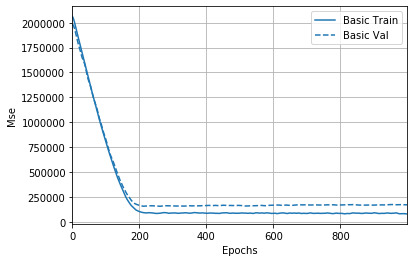

In [40]:
plotter.plot({'Basic': history}, metric = "mse")

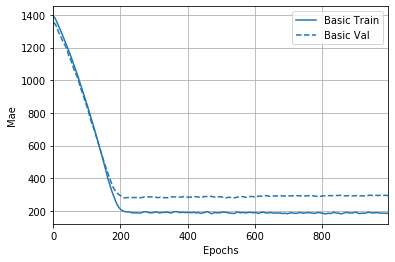

In [41]:
plotter.plot({'Basic': history}, metric = "mae")

In [42]:
loss, mae, mse = model.evaluate(X_test_scaled, y_test, verbose=2)



152/152 - 0s - loss: 752588.9951 - mae: 423.5284 - mse: 752589.0000


In [43]:
print("Testing set Mean Abs Error: ${:5.2f}".format(mae))

Testing set Mean Abs Error: $423.53


In [46]:
model.save("keras_model.h5")

In [49]:
import pickle
pickle.dump(min_max_scaler, open("min_max_scaler.pkl", "wb"))